In [1]:
import pandas as pd
import numpy as np
import os

import pandas as pd
df = pd.read_csv("csvs/instabilitytimes.csv", index_col=0)
df.head()

,K,mag,filename,tmax,tinstability,Eerr1,Eerrf,tinstability_index
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,5.000000e+07,5.822356e-08,4.967208e-07,NaN
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,5.000000e+07,3.297564e-07,2.164101e-07,NaN
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,5.000000e+07,3.569262e-08,5.113791e-04,NaN
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,2.869029e+06,2.234090e-06,8.162635e-01,2869.0
7,14.211,0.218650,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,5.000000e+07,3.204928e-08,1.226401e-03,NaN


In [2]:
N=df.shape[0]
ts = np.sort(df['tinstability'])
cumsum = np.zeros(N)
tot = 0.
for i,t in enumerate(ts):
    if t < 5.e6:
        tot += 1.
    if t > 5.e6 and t < 5.e7:
        tot += N/21
    cumsum[i] = tot/N

In [3]:
dfnr = pd.read_csv('csvs/nonresinstabilitytimes.csv', index_col=0)
dfnr.head()
Nnr=dfnr.shape[0]
tsnr = np.sort(dfnr['tinstability'])
cumsumnr = np.zeros(Nnr)
tot = 0.
for i,t in enumerate(tsnr):
    if t < 5.e6:
        tot += 1.
    cumsumnr[i] = tot/N

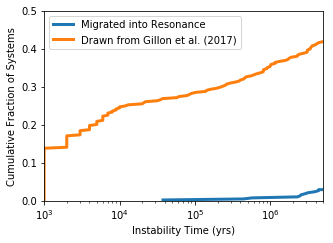

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('paper')

fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(ts,cumsum, lw=3, label='Migrated into Resonance')
ax.plot(tsnr, cumsumnr, lw=3,label='Drawn from Gillon et al. (2017)')
ax.set_xscale('log')
ax.set_ylim([0,0.5])
ax.set_xlim([1e3,5e6])
ax.set_xlabel('Instability Time (yrs)')
ax.set_ylabel('Cumulative Fraction of Systems')
ax.legend()
fig.savefig('fig3.pdf', bbox_inches='tight')